In [5]:
from xgboost import XGBRegressor
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
import matplotlib.pyplot as plt
import time
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


path = Path(r"C:\Users\Flin\OneDrive - TU Eindhoven\Flin\Flin\01 - Uni\00_Internship\Nokia\00_Programming\forecasting\misc_datasets\SARIMAX_transformed_df.csv")
df = pd.read_csv(path)
TINY_TEST = False

In [6]:
def X_and_y(df):
    y = df["y"].values
    X = df.drop(columns=["datetimes", "y"]).to_numpy()

    return X, y

In [7]:
if TINY_TEST:
    df = df.iloc[:1000]

F = 0.75
n = int(len(df)*F)

df_train = df.iloc[:n]
df_test = df.iloc[n:]

train_X, train_y = X_and_y(df_train)
test_X, test_y = X_and_y(df_test)

In [8]:
def make_model_XGB(lr):
    return XGBRegressor(n_estimators=400, max_depth=40, learning_rate=lr)

def make_model(lr):
    return RandomForestRegressor(n_estimators=1_000, max_features=0.9)

def calc_metrics(results):
    for suffix in ["", "_train", "_test"]:
        for metric_name, metric_func in {"mae": mean_absolute_error, "mse": mean_squared_error, "r2": r2_score}.items():
            y = results[f"y{suffix}"]
            yhat = results[f"yhat{suffix}"]

            value = metric_func(y, yhat)

            results[f"{metric_name}{suffix}"] = value

    return results
        


In [9]:
lr_dicts = {}

In [10]:
name = "RFR_ne=1000_mf=0.9"

if name.startswith("RFR"):
    XGBOOST = False
    lrs = [0]
else:
    XGBOOST =True
    lrs = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]

assert name not in list(lr_dicts.keys())

lr_dict = {}

for lr in lrs:
    if XGBOOST:
        model = make_model_XGB(lr)
    else:
        model = make_model(lr)

    now = time.time()
    
    model.fit(X=train_X, y=train_y)
    fit_elapsed = time.time() - now

    now = time.time()
    yhat_train = model.predict(X=train_X)
    yhat_test = model.predict(X=test_X)
    predict_elapsed = time.time() - now

    print(f"{lr}: {fit_elapsed+predict_elapsed:.2f}")

    yhat = list(yhat_train) + list(yhat_test)

    y = list(train_y) + list(test_y)

    results = {"fit_elapsed": fit_elapsed, "train_elapsed": predict_elapsed,
            "y_train": train_y, "y_test": test_y, "yhat_train": yhat_train,
            "yhat_test": yhat_test, "y": y, "yhat": yhat}

    results = calc_metrics(results)

    lr_dict[lr] = results

lr_dicts[name] = lr_dict


0: 107.01


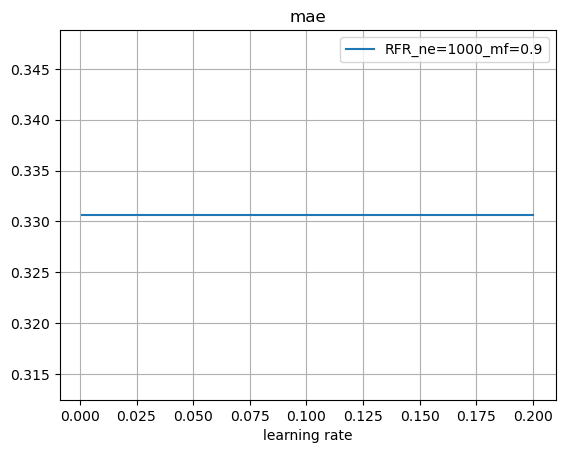

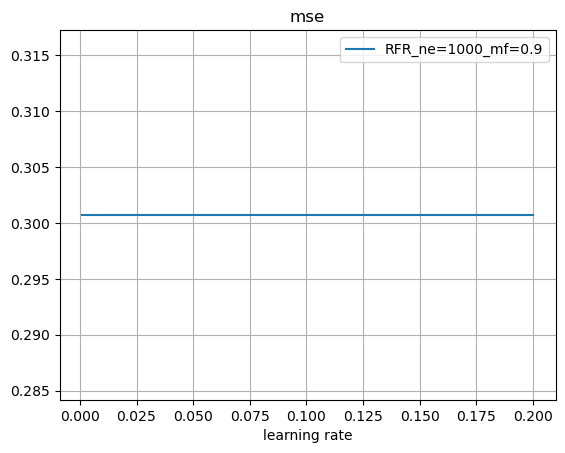

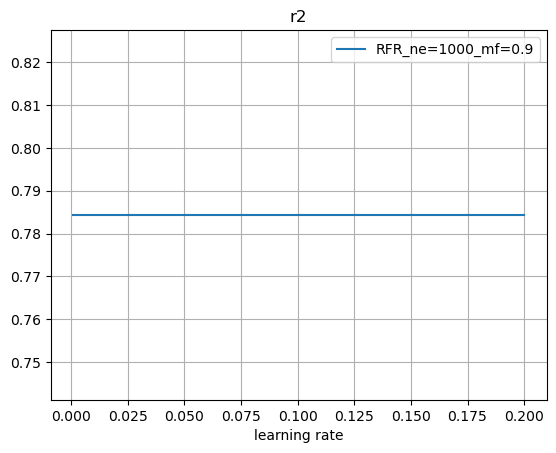

In [11]:
metrics = ["mae", "mse", "r2"]
for metric in metrics:
    for key, lr_dict in lr_dicts.items():
    
        lrs, vs = [], []
        for lr, res in lr_dict.items():
            v = res[f"{metric}_test"]
            lrs.append(lr), vs.append(v)

        if key.startswith("RFR"):
            lrs = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
            vs = vs*6

        plt.plot(lrs, vs, label=key)
    
    plt.xlabel("learning rate")
    plt.grid()

    plt.legend()
    plt.title(metric)
    plt.show()

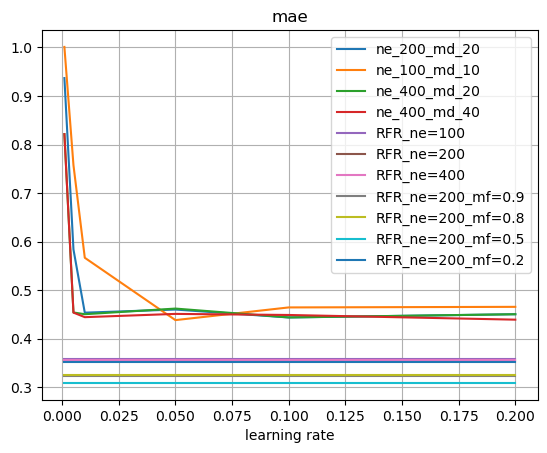

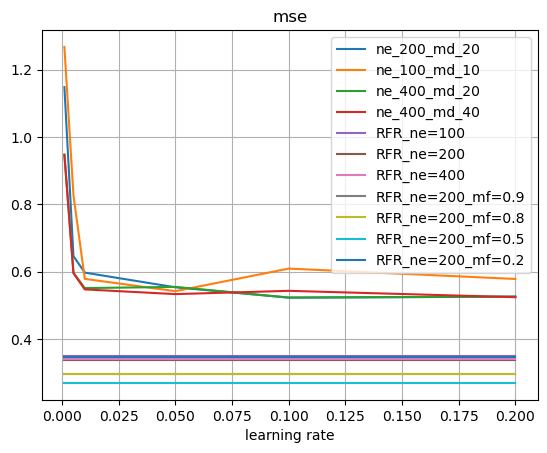

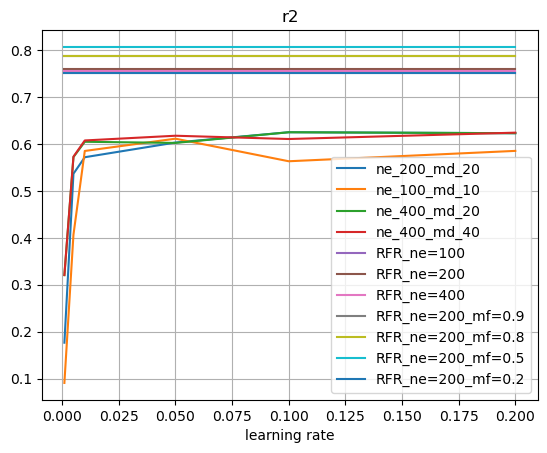

In [88]:
metrics = ["mae", "mse", "r2"]
for metric in metrics:
    for key, lr_dict in lr_dicts.items():
    
        lrs, vs = [], []
        for lr, res in lr_dict.items():
            v = res[f"{metric}_test"]
            lrs.append(lr), vs.append(v)

        if key.startswith("RFR"):
            lrs = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
            vs = vs*6

        plt.plot(lrs, vs, label=key)
    
    plt.xlabel("learning rate")
    plt.grid()

    plt.legend()
    plt.title(metric)
    plt.show()

0.2 0.09078043075027908
0.1 0.4657357566968565
0.05 0.46455238282267736
0.01 0.43842307103042916
0.005 0.5668305173988928
0.001 0.757666154502718
0.2 1.0011083231315394
0.1 0.5782502161998835
0.05 0.6090857549230033
0.01 0.5419570755069799
0.005 0.5784773329735454
0.001 0.8273024783393181
0.2 1.267959894643716
0.1 0.5853524904748282
0.05 0.5632411639621737
0.01 0.6113773149877466
0.005 0.5851896312109109
0.001 0.4067638841161755


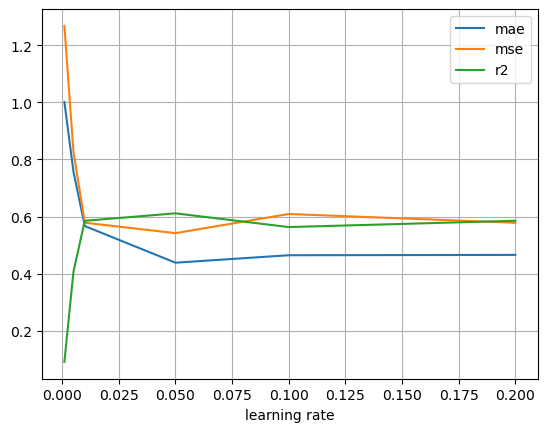

In [33]:
metrics = ["mae", "mse", "r2"]

for metric in metrics:
    lrs, vs = [], []
    for lr, res in lr_dict.items():
        v = res[f"{metric}_test"]
        lrs.append(lr), vs.append(v)

    plt.plot(lrs, vs, label=metric)
    plt.xlabel("learning rate")
    plt.grid()
plt.legend()


In [35]:
prev_lr_dict = lr_dict

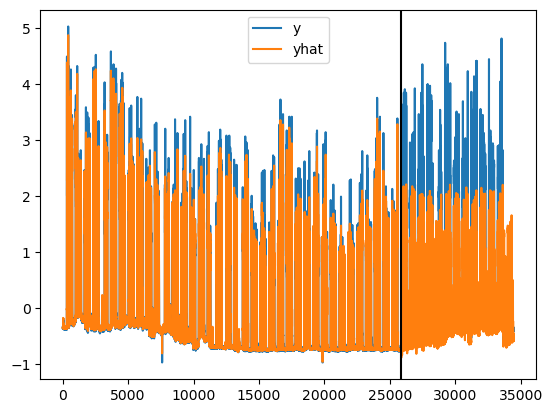

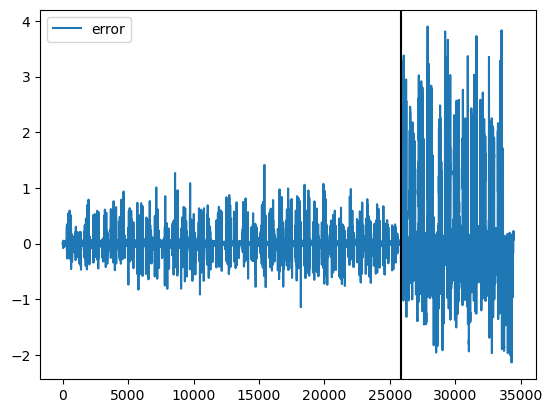

In [9]:
plt.plot(y, label="y")
plt.plot(yhat, label="yhat")
plt.axvline(x=n, color="black")
plt.legend()
plt.show()

assert len(y) == len(yhat)
d = [_y - _yh for _y, _yh in zip(y, yhat)]
plt.plot(d, label="error")

plt.axvline(x=n, color="black")
plt.legend()

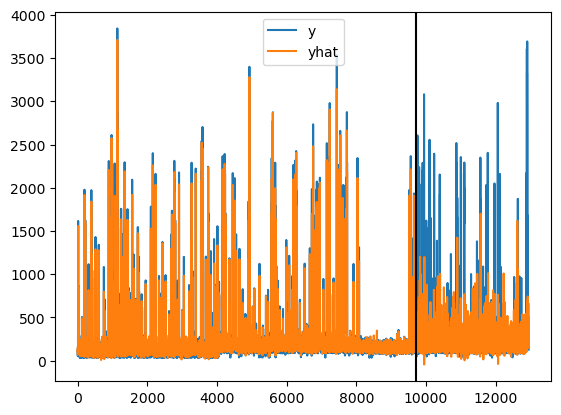

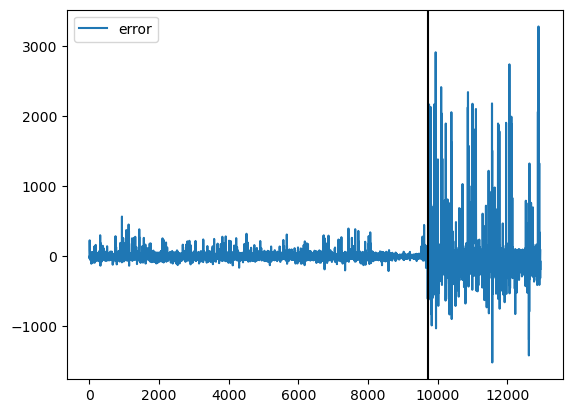

In [30]:

plt.plot(y, label="y")
plt.plot(yhat, label="yhat")
plt.axvline(x=n, color="black")
plt.legend()
plt.show()

assert len(y) == len(yhat)
d = [_y - _yh for _y, _yh in zip(y, yhat)]
plt.plot(d, label="error")

plt.axvline(x=n, color="black")
plt.legend()


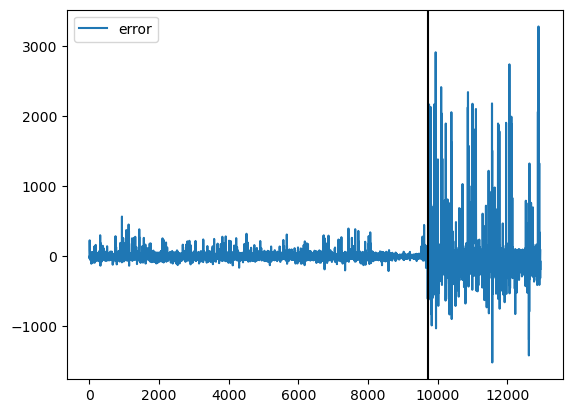